findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

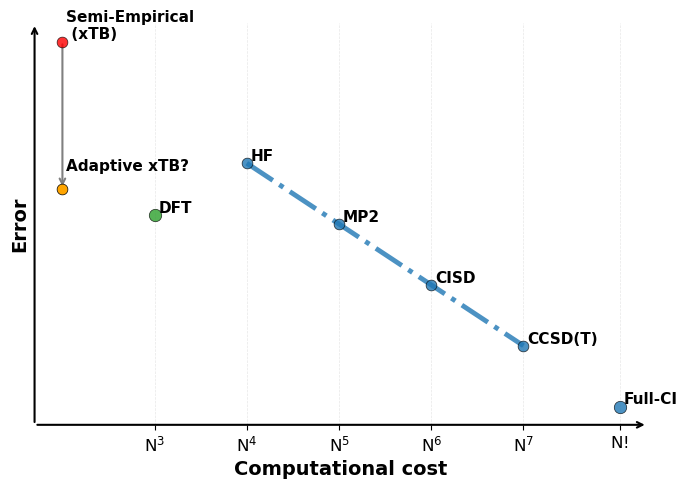

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.ndimage import gaussian_filter1d
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.rm"] = "Times New Roman"
mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 14
mpl.rcParams["xtick.labelsize"] = 12
mpl.rcParams["ytick.labelsize"] = 12
# Reference system size
N = 12
# Cost scalings
cost_SE = N**2
cost_HF = N**4
cost_MP2 = N**5
cost_CISD = N**6
cost_CCSDT = N**7
cost_FCI = math.factorial(N)
cost_KSDFT = N**3
cost_DMC = N**4.7
# Errors (arbitrary units)
err_SE = 10.0
err_HF = 1e-1
err_MP2 = 1e-2
err_CISD = 1e-3
err_CCSDT = 1e-4
err_FCI = 1e-5
err_KSDFT = 1.4e-2
err_DMC = 3e-4
# Adaptive xTB: error chosen between HF and KS-DFT
err_adaptive = math.sqrt(err_HF * err_KSDFT)
# Data arrays
costs = np.array(
    [cost_SE, cost_HF, cost_MP2, cost_CISD, cost_CCSDT, cost_FCI, cost_KSDFT, cost_DMC]
)
errors = np.array(
    [err_SE, err_HF, err_MP2, err_CISD, err_CCSDT, err_FCI, err_KSDFT, err_DMC]
)
labels = [
    "Semi-Empirical \n (xTB)",
    "HF",
    "MP2",
    "CISD",
    "CCSD(T)",
    "Full-CI",
    "DFT",
    "DMC",
]
colors = ["red"] + ["#1F77B4"] * 5 + ["#2CA02C", "#D62728"]
sizes = [60] * 5 + [80, 80]
fig, ax = plt.subplots(figsize=(7, 5))
# Connect HF→MP2→CISD→CCSD(T)
ax.plot(costs[1:-3], errors[1:-3], alpha=0.8, linestyle="dashdot", linewidth=3.5)
# Scatter all original points
for x, y, label, c, s in zip(costs, errors, labels, colors, sizes):
    ax.scatter(
        x, y, color=c, s=s, alpha=0.8, edgecolor="black", linewidth=0.5, zorder=3
    )
    ax.text(x * 1.1, y * 1.1, label, fontsize=11, fontweight="bold", zorder=4)
# Add Adaptive xTB directly below xTB
ax.scatter(
    cost_SE,
    err_adaptive,
    color="orange",
    s=60,
    edgecolor="black",
    linewidth=0.5,
    zorder=3,
)
ax.text(
    cost_SE * 1.1,
    err_adaptive * 2,
    "Adaptive xTB?",
    fontsize=11,
    fontweight="bold",
    zorder=4,
)
# Draw vertical arrow from xTB to Adaptive xTB
ax.annotate(
    "",
    xy=(cost_SE, err_adaptive),
    xytext=(cost_SE, err_SE),
    arrowprops=dict(arrowstyle="->", lw=1.5, color="gray"),
    zorder=2,
)
# Log scales
ax.set_xscale("log")
ax.set_yscale("log")
# Custom x-ticks
xticks = [cost_KSDFT, cost_HF, cost_MP2, cost_CISD, cost_CCSDT, cost_FCI]
xticklabels = [r"$N^3$", r"$N^4$", r"$N^5$", r"$N^6$", r"$N^7$", r"$N!$"]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
# Axis labels
ax.set_xlabel("Computational cost", fontweight="bold")
ax.set_ylabel("Error", fontweight="bold")
# Aesthetic tweaks
ax.set_yticks([])
ax.minorticks_off()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(True, which="major", axis="x", linestyle="--", linewidth=0.5, alpha=0.3)
# Arrowed axis spines
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.annotate(
    "",
    xy=(xlim[1], ylim[0]),
    xytext=(xlim[0], ylim[0]),
    arrowprops=dict(arrowstyle="->", lw=1.5, color="black"),
)
ax.annotate(
    "",
    xy=(xlim[0], ylim[1]),
    xytext=(xlim[0], ylim[0]),
    arrowprops=dict(arrowstyle="->", lw=1.5, color="black"),
)
plt.tight_layout()
#save as svg
plt.savefig("report/qc_cost_with_adaptive_xtb.svg", dpi=300, bbox_inches="tight")
plt.show()